In [1]:
%pylab inline
from scipy.special import gamma, polygamma
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Define potential function

<img alt="" src="figs/KT_potential.png" style="height:92px; width:964px" />

In [2]:
gamma(4)

6.0

In [3]:
def F(t,x):
    a=gamma((t+1.+x)/2)*gamma((t+1.-x)/2)
    b=(2**t)/(np.pi*gamma(t+1))
    return a*b

In [4]:
F(2,1),beta(2,1)

(0.6366197723675814, 0.5671807608733467)

In [5]:
X=np.arange(-3,3,0.01)
Y=np.zeros(len(X))
X.shape[0],Y.shape

(600, (600,))

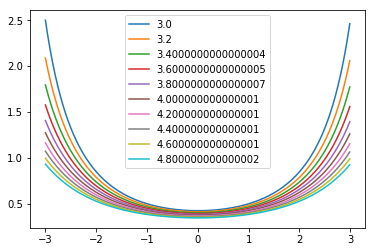

In [13]:
for t in arange(3,5,0.2):
    for i in range(X.shape[0]):
        Y[i] = F(t,X[i])
    plot(X,Y,label=str(t))
legend()

### Define recursive condition
<img alt="" src="figs/Condition.png" style="height:92px; width:964px" />

In [6]:
def beta(t,x):
    return (F(t,x+1)-F(t,x-1))/(F(t,x+1)+F(t,x-1))

In [7]:
def upper(g,x,t):
    return (1+g*beta(t,x))*F(t-1,x)

### Visualize recursive condition

In [12]:
x=-1
epsilon=0.001
deriv=(F(t-1,x+epsilon)-F(t-1,x-epsilon))/(2*epsilon)
deriv

-0.0008120522170529387

In [13]:
x=-1; t=100;
X=arange(-1,+1,0.01)
Fv=np.zeros(len(X))
Fv1=np.zeros(len(X))
U=np.zeros(len(X))
W=np.zeros(len(X))
for i in range(X.shape[0]):
    Fv[i]=F(t,x+X[i])
    Fv1[i]=F(t-1,x+X[i])
    U[i]=upper(X[i],x,t)
    W[i]=F(t,x-1) + deriv*(X[i]+1)
#plot(X,W,label='slope based bound')

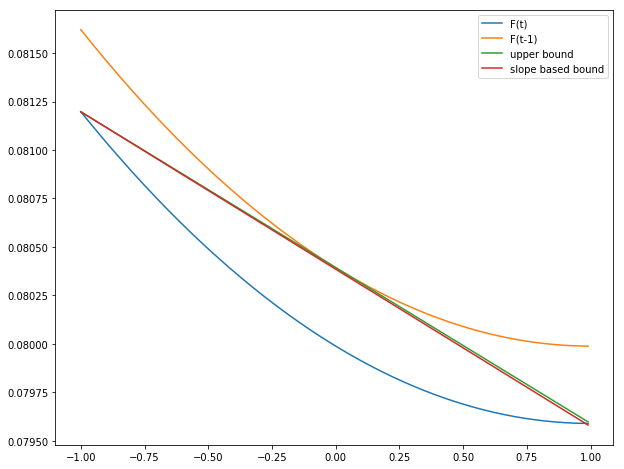

In [14]:
figure(figsize=[10,8])
plot(X,Fv,label='F(t)')
plot(X,Fv1,label='F(t-1)')
plot(X,U,label='upper bound')
plot(X,W,label='slope based bound')
#xlim([-0.3,0.3])
legend()

### We are using the finite step slope

In [15]:
(F(t,x+1)-F(t,x-1))/2

-0.000803931690779601

### We should be using the slope of F at (t-1,x)

In [16]:
epsilon=0.001
deriv=(F(t-1,x+epsilon)-F(t-1,x-epsilon))/(2*epsilon)
deriv

-0.0008120522170529387

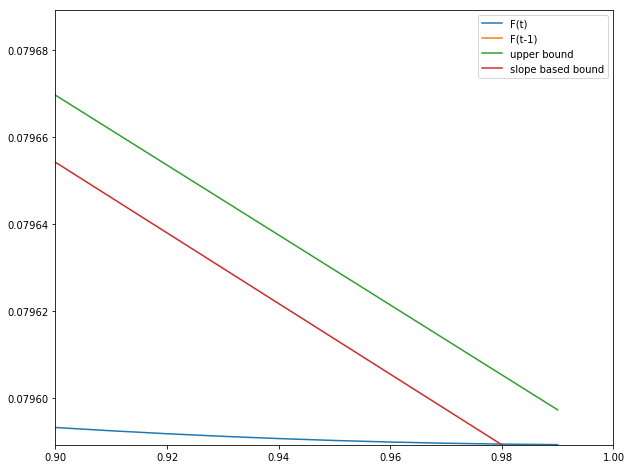

In [17]:
figure(figsize=[10,8])
plot(X,Fv,label='F(t)')
plot(X,Fv1,label='F(t-1)')
plot(X,U,label='upper bound')
plot(X,W,label='slope based bound')
xlim([0.9,1.0])
ylim(F(t,x+1),F(t,x+1)+0.0001)
legend()

In [18]:
# taking derivative (see symbolic manipulation notebook)
def D(t,x):
    return 2**t*(-polygamma(0, t/2 - x/2 + 0.5) + polygamma(0, t/2 + x/2 + 0.5))*gamma(t/2 - x/2 + 0.5)*gamma(t/2 + x/2 + 0.5)/(2*pi*gamma(t + 1))

In [36]:
def D2(t,x):
    r=2**t*(polygamma(0, t/2 - x/2 + 0.5)**2 - 2*polygamma(0, t/2 - x/2 + 0.5)*\
                 polygamma(0, t/2 + x/2 + 0.5) + polygamma(0, t/2 + x/2 + 0.5)**2 + polygamma(1, t/2 - x/2 + 0.5) + polygamma(1, t/2 + x/2 + 0.5))*gamma(t/2 - x/2 + 0.5)*gamma(t/2 + x/2 + 0.5)/(4*pi*gamma(t + 1))
    if abs(r)<100:
        return r
    else:
        return 0

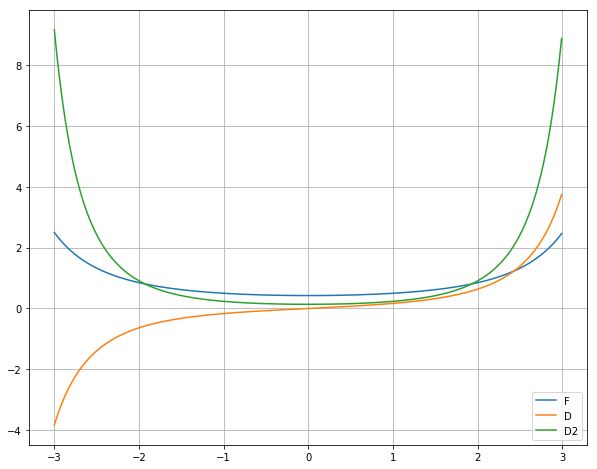

In [40]:
figure(figsize=[10,8])
X=arange(-3,3,0.01)
Y1=np.zeros(len(X))
Y2=np.zeros(len(X))
t=3
for i in range(X.shape[0]):
    Y[i] = F(t,X[i])
    Y1[i] = D(t,X[i])
    Y2[i] = D2(t,X[i])

plot(X,Y,label='F')
plot(X,Y1,label='D')
plot(X,Y2,label='D2')
legend()
grid()